# **[ DATA EDA & PRE_PROCESSING ]** for perfume recommendation system

## 데이터 결측치 제거

### 존재하지 않는 note

In [1]:
item_df = pd.read_csv("item_df_final.csv")

In [2]:
(item_df.notes == "[]").value_counts()

False    5826
True      568
Name: notes, dtype: int64

- 총 568개의 향수의 note가 존재하지 않음 => 제거

In [3]:
item_df = item_df[item_df.notes != '[]']

### Removing no ratings

In [4]:
(item_df.rating == "Not enough ratings").value_counts()

False    5778
True       48
Name: rating, dtype: int64

- 총 48개의 Not enough ratings => 제거

In [5]:
item_df = item_df[item_df.rating != "Not enough ratings"]

In [6]:
(item_df.rating == "In Productio").value_counts()

False    5547
True      231
Name: rating, dtype: int64

- 총 231개의 In Production : Not enough ratings일 경우 In Production으로 출력 => 제거

In [7]:
item_df = item_df[item_df.rating != "In Productio"]

In [8]:
(item_df.rating == "Discontinue").value_counts()

False    5502
True       45
Name: rating, dtype: int64

- 총 45개의 Discontinued : 더 이상 생산하지 않는 향수 => 제거

In [9]:
item_df = item_df[item_df.rating != "Discontinue"]

In [10]:
len(item_df)

5502

**=> 결측치 제거 후 총 5502개의 향수 데이터**

In [11]:
# 인덱스 새롭게 부여해주기
item_df.reset_index(inplace=True, drop=True)

### 이름 예쁘게 정리

In [12]:
# names에서 information 글자 삭제하는 법
item_df['names'] = item_df['names'].str.replace(' information', "")
item_df

,item_url,item_id,review,names,notes,house,rating,gender
0,https://www.basenotes.net/ID26125576.html,ID26125576,83.0,Insolence Eau de Toilette,"['Bergamot', 'Raspberry', 'Red berries', 'Lemo...",LVMH Moet Hennessy Louis Vuitton,3.41,Feminine
1,https://www.basenotes.net/ID26125684.html,ID26125684,6.0,Inspiration,"['Pink peppercorn', 'Pomegranate', 'Mirabelle ...",Procter & Gamble,3.52,Feminine
2,https://www.basenotes.net/ID26159251.html,ID26159251,5.0,Instant Crush,"['Citrus fruits', 'Saffron', 'Ginger', 'Morocc...",Procter & Gamble,3.86,Feminine
3,https://www.basenotes.net/ID26144138.html,ID26144138,13.0,Insurrection II Pure,"['Pineapple', 'Vanilla', 'Birch']",Procter & Gamble,3.79,Masculine
4,https://www.basenotes.net/ID26143347.html,ID26143347,10.0,Intense Black,"['Calabrian lemon', 'Italian bergamot', 'Atlas...",Parour,3.64,Masculine
...,...,...,...,...,...,...,...,...
5497,https://www.basenotes.net/ID10210418.html,ID10210418,13.0,Initial,"['Blackcurrant', 'Muguet', 'Tangerine', 'Rose'...",Inter Parfums,3.49,Feminine
5498,https://www.basenotes.net/ID10213063.html,ID10213063,10.0,Inouï,"['Galbanum', 'Peach', 'Juniper', 'Lemon', 'Gre...",Groupe Clarins,4.30,Feminine
5499,https://www.basenotes.net/ID26120837.html,ID26120837,68.0,Insensé,"['Blackcurrant', 'Mandarin', 'Basil.', 'Magnol...",LVMH Moet Hennessy Louis Vuitton,3.88,Masculine
5500,https://www.basenotes.net/ID26120838.html,ID26120838,38.0,Insensé Ultramarine,"['Water fruits', 'Galbanum.', 'Cardamom', 'Min...",LVMH Moet Hennessy Louis Vuitton,3.26,Masculine


In [14]:
item_df.to_csv("item_df_prepro.csv", index=False)

## 데이터 가공 및 전처리

In [33]:
item_df = pd.read_csv("item_df_prepro.csv")

In [34]:
from ast import literal_eval

### note 처리

In [35]:
item_df["notes"] = item_df["notes"].apply(literal_eval)
item_df["notes"]

0       [Bergamot, Raspberry, Red berries, Lemon, Oran...
1       [Pink peppercorn, Pomegranate, Mirabelle plum,...
2       [Citrus fruits, Saffron, Ginger, Moroccan rose...
3                             [Pineapple, Vanilla, Birch]
4       [Calabrian lemon, Italian bergamot, Atlas ceda...
                              ...                        
5497    [Blackcurrant, Muguet, Tangerine, Rose, Jasmin...
5498    [Galbanum, Peach, Juniper, Lemon, Green accord...
5499    [Blackcurrant, Mandarin, Basil., Magnolia, Lil...
5500    [Water fruits, Galbanum., Cardamom, Mint Leave...
5501                                    [Red berries, , ]
Name: notes, Length: 5502, dtype: object

In [36]:
for idx, row in item_df.iterrows():
    if "" in row.notes :
        y = [x.replace(" ", "-") for x in row.notes]
        x = " ".join(y).strip().split(" ")
        item_df.loc[idx, "notes"] = str(x)
item_df["notes"]

0       [Bergamot, Raspberry, Red berries, Lemon, Oran...
1       [Pink peppercorn, Pomegranate, Mirabelle plum,...
2       [Citrus fruits, Saffron, Ginger, Moroccan rose...
3                             [Pineapple, Vanilla, Birch]
4       [Calabrian lemon, Italian bergamot, Atlas ceda...
                              ...                        
5497    [Blackcurrant, Muguet, Tangerine, Rose, Jasmin...
5498    [Galbanum, Peach, Juniper, Lemon, Green accord...
5499    [Blackcurrant, Mandarin, Basil., Magnolia, Lil...
5500    [Water fruits, Galbanum., Cardamom, Mint Leave...
5501                                      ['Red-berries']
Name: notes, Length: 5502, dtype: object

In [37]:
item_df.to_csv("item_df_for_checking.csv", index=False)

In [13]:
(item_df["notes"] == "['']").value_counts()

False    5280
True      222
Name: notes, dtype: int64

In [74]:
item_df = pd.read_csv("item_df_for_checking.csv")

In [75]:
idx_blank = item_df[item_df["notes"] == "['']"].index

In [76]:
import requests
from bs4 import BeautifulSoup

for idx in idx_blank:
    print("====== {} idx =====".format(idx))
    url = item_df.loc[idx, "item_url"]
    req = requests.get(url=url)
    soup = BeautifulSoup(req.text, 'html.parser')
    try:
        note = soup.find("div", {"class":"notespyramid notespyramidb"}).select("div")
        ls = []
        for x in note:
            for y  in x.text.strip().split(", "):
                ls.append(y)
        item_df.loc[idx, "notes"] = str(ls)
    except:
        item_df.drop(index=idx, inplace=True)
        print("drop")

====== 19 idx =====
====== 27 idx =====
====== 50 idx =====
====== 75 idx =====
====== 95 idx =====
====== 96 idx =====
====== 140 idx =====
====== 141 idx =====
====== 201 idx =====
====== 240 idx =====
====== 262 idx =====
====== 285 idx =====
====== 289 idx =====
====== 334 idx =====
====== 335 idx =====
====== 357 idx =====
====== 376 idx =====
====== 378 idx =====
====== 379 idx =====
====== 409 idx =====
====== 452 idx =====
====== 489 idx =====
====== 497 idx =====
====== 505 idx =====
====== 568 idx =====
====== 617 idx =====
====== 620 idx =====
====== 651 idx =====
====== 666 idx =====
====== 684 idx =====
====== 725 idx =====
====== 768 idx =====
====== 776 idx =====
====== 787 idx =====
====== 794 idx =====
====== 833 idx =====
====== 978 idx =====
====== 1014 idx =====
====== 1026 idx =====
====== 1029 idx =====
====== 1036 idx =====
====== 1038 idx =====
====== 1045 idx =====
drop
====== 1049 idx =====
====== 1051 idx =====
====== 1058 idx =====
====== 1071 idx =====
====

In [77]:
idx_top = []
for idx, row in item_df.iterrows():
    if 'Top-Notes' in row.notes:
        idx_top.append(idx)

In [78]:
for idx in idx_top:
    print("====== {} idx =====".format(idx))
    url = item_df.loc[idx, "item_url"]
    req = requests.get(url=url)
    soup = BeautifulSoup(req.text, 'html.parser')
    try:
        note = soup.find("div", {"class":"notespyramid notespyramidb"}).select("div")
        ls = []
        for x in note:
            for y  in x.text.strip().split(", "):
                ls.append(y)
        item_df.loc[idx, "notes"] = str(ls)
    except:
        item_df.drop(index=idx, inplace=True)
        print("drop")

====== 113 idx =====
====== 154 idx =====
====== 187 idx =====
====== 740 idx =====
====== 1028 idx =====
====== 1095 idx =====
====== 1102 idx =====
====== 1128 idx =====
====== 1169 idx =====
====== 1241 idx =====
====== 1277 idx =====
====== 1467 idx =====
====== 1563 idx =====
====== 1608 idx =====
====== 1751 idx =====
====== 1827 idx =====
====== 1828 idx =====
====== 1833 idx =====
====== 1834 idx =====
====== 1835 idx =====
====== 1837 idx =====
====== 1843 idx =====
====== 2077 idx =====
====== 2101 idx =====
====== 2216 idx =====
====== 2268 idx =====
====== 2350 idx =====
====== 2590 idx =====
====== 2655 idx =====
====== 2836 idx =====
====== 2876 idx =====
====== 2902 idx =====
====== 2932 idx =====
====== 2941 idx =====
====== 2943 idx =====
====== 2947 idx =====
====== 2952 idx =====
====== 2953 idx =====
====== 2959 idx =====
====== 3041 idx =====
====== 3162 idx =====
====== 3243 idx =====
====== 3467 idx =====
====== 3518 idx =====
====== 3569 idx =====
====== 3695 id

In [79]:
idx_base = []
for idx, row in item_df.iterrows():
    if "Base-notes" in row.notes:
        idx_base.append(idx)

In [80]:
for idx in idx_base:
    print("====== {} idx =====".format(idx))
    url = item_df.loc[idx, "item_url"]
    req = requests.get(url=url)
    soup = BeautifulSoup(req.text, 'html.parser')
    try:
        note = soup.find("div", {"class":"notespyramid notespyramidb"}).select("div")
        ls = []
        for x in note:
            for y  in x.text.strip().split(", "):
                ls.append(y)
        item_df.loc[idx, "notes"] = str(ls)
    except:
        item_df.drop(index=idx, inplace=True)
        print("drop")

====== 245 idx =====
====== 281 idx =====
====== 447 idx =====
====== 466 idx =====
====== 494 idx =====
====== 554 idx =====
====== 602 idx =====
====== 616 idx =====
====== 757 idx =====
====== 852 idx =====
====== 906 idx =====
====== 912 idx =====
====== 922 idx =====
====== 946 idx =====
====== 975 idx =====
====== 1030 idx =====
====== 1054 idx =====
====== 1226 idx =====
====== 1292 idx =====
====== 1334 idx =====
====== 1341 idx =====
====== 1342 idx =====
====== 1353 idx =====
====== 1493 idx =====
====== 1502 idx =====
====== 1655 idx =====
====== 1669 idx =====
====== 1731 idx =====
====== 1750 idx =====
====== 1819 idx =====
====== 1865 idx =====
====== 1885 idx =====
====== 1895 idx =====
====== 2032 idx =====
====== 2049 idx =====
====== 2169 idx =====
====== 2174 idx =====
====== 2249 idx =====
====== 2257 idx =====
====== 2378 idx =====
====== 2473 idx =====
====== 2498 idx =====
====== 2694 idx =====
====== 2706 idx =====
====== 2723 idx =====
====== 2816 idx =====
===

In [81]:
item_df["notes"] = item_df["notes"].apply(literal_eval)

0       [Bergamot, Raspberry, Red berries, Lemon, Oran...
1       [Pink peppercorn, Pomegranate, Mirabelle plum,...
2       [Citrus fruits, Saffron, Ginger, Moroccan rose...
3                             [Pineapple, Vanilla, Birch]
4       [Calabrian lemon, Italian bergamot, Atlas ceda...
                              ...                        
5497    [Blackcurrant, Muguet, Tangerine, Rose, Jasmin...
5498    [Galbanum, Peach, Juniper, Lemon, Green accord...
5499    [Blackcurrant, Mandarin, Basil., Magnolia, Lil...
5500    [Water fruits, Galbanum., Cardamom, Mint Leave...
5501                                        [Red-berries]
Name: notes, Length: 5498, dtype: object

In [82]:
# 문장 들어가있는거 제거하기
idx_sentence = []
for idx, row in item_df.iterrows():
    for x in row.notes:
        if len(x) > 50 :
            item_df.loc[idx,"notes"].remove(x)

In [87]:
for idx, row in item_df.iterrows():
        y = [x.replace("-", " ") for x in row.notes]
        item_df.loc[idx, "notes"] = str(y)

In [97]:
item_df["notes"] = item_df["notes"].apply(literal_eval)

0       [Bergamot, Raspberry, Red berries, Lemon, Oran...
1       [Pink peppercorn, Pomegranate, Mirabelle plum,...
2       [Citrus fruits, Saffron, Ginger, Moroccan rose...
3                             [Pineapple, Vanilla, Birch]
4       [Calabrian lemon, Italian bergamot, Atlas ceda...
                              ...                        
5497    [Blackcurrant, Muguet, Tangerine, Rose, Jasmin...
5498    [Galbanum, Peach, Juniper, Lemon, Green accord...
5499    [Blackcurrant, Mandarin, Basil, Magnolia, Lily...
5500    [Water fruits, Galbanum, Cardamom, Mint Leaves...
5501                                        [Red berries]
Name: notes, Length: 5498, dtype: object

In [90]:
item_df["notes"] = item_df["notes"].apply(literal_eval)
for idx, row in item_df.iterrows():
        y = [x.replace(".", " ") for x in row.notes]
        item_df.loc[idx, "notes"] = str(y)

In [95]:
item_df["notes"] = item_df["notes"].apply(literal_eval)  
for idx, row in item_df.iterrows():      
    y = [x.strip() for x in row.notes]
    item_df.loc[idx, "notes"] = str(y)

### rating 처리

In [ ]:
idx_wrong_rate = []
for idx, row in item_df.iterrows():
    try:
        rate = float(row.rating)
    except:
        idx_wrong_rate.append(idx)
        print("========= {} 오류 =========".format(idx))

In [ ]:
item_df_final = item_df.drop(index=idx_wrong_rate, axis=0)
item_df_final.reset_index(inplace=True, drop=True)

In [ ]:
item_df_final.to_csv("item_df_final_final.csv", index=False)

## 데이터 분포 살펴보기

In [1]:
item_df_final = pd.read_csv("item_df_final_final.csv")
item_df_final

,item_url,item_id,review,names,notes,house,rating,gender
0,https://www.basenotes.net/ID26125576.html,ID26125576,83.0,Insolence Eau de Toilette,"['Bergamot', 'Raspberry', 'Red berries', 'Lemo...",LVMH Moet Hennessy Louis Vuitton,3.41,Feminine
1,https://www.basenotes.net/ID26125684.html,ID26125684,6.0,Inspiration,"['Pink peppercorn', 'Pomegranate', 'Mirabelle ...",Procter & Gamble,3.52,Feminine
2,https://www.basenotes.net/ID26159251.html,ID26159251,5.0,Instant Crush,"['Citrus fruits', 'Saffron', 'Ginger', 'Morocc...",Procter & Gamble,3.86,Feminine
3,https://www.basenotes.net/ID26144138.html,ID26144138,13.0,Insurrection II Pure,"['Pineapple', 'Vanilla', 'Birch']",Procter & Gamble,3.79,Masculine
4,https://www.basenotes.net/ID26143347.html,ID26143347,10.0,Intense Black,"['Calabrian lemon', 'Italian bergamot', 'Atlas...",Parour,3.64,Masculine
...,...,...,...,...,...,...,...,...
5465,https://www.basenotes.net/ID10210418.html,ID10210418,13.0,Initial,"['Blackcurrant', 'Muguet', 'Tangerine', 'Rose'...",Inter Parfums,3.49,Feminine
5466,https://www.basenotes.net/ID10213063.html,ID10213063,10.0,Inouï,"['Galbanum', 'Peach', 'Juniper', 'Lemon', 'Gre...",Groupe Clarins,4.30,Feminine
5467,https://www.basenotes.net/ID26120837.html,ID26120837,68.0,Insensé,"['Blackcurrant', 'Mandarin', 'Basil', 'Magnoli...",LVMH Moet Hennessy Louis Vuitton,3.88,Masculine
5468,https://www.basenotes.net/ID26120838.html,ID26120838,38.0,Insensé Ultramarine,"['Water fruits', 'Galbanum', 'Cardamom', 'Mint...",LVMH Moet Hennessy Louis Vuitton,3.26,Masculine


### review

<AxesSubplot:>

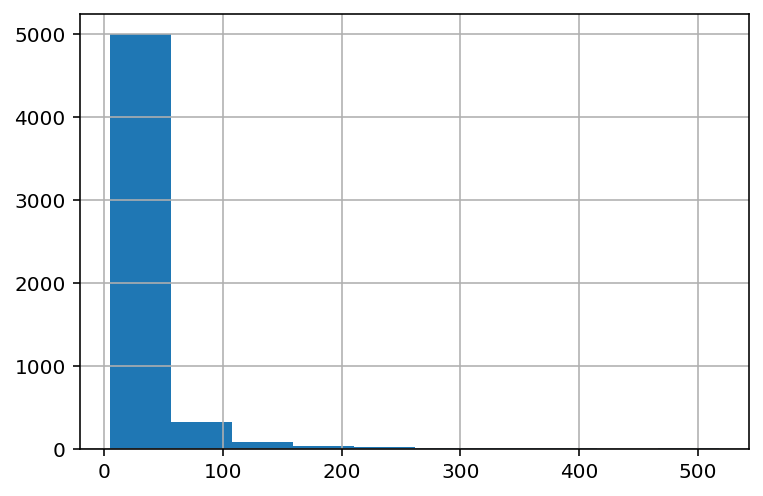

In [2]:
item_df_final.review.hist()

- review 는 0 - 50 사이에 screwed 되어있다

<AxesSubplot:>

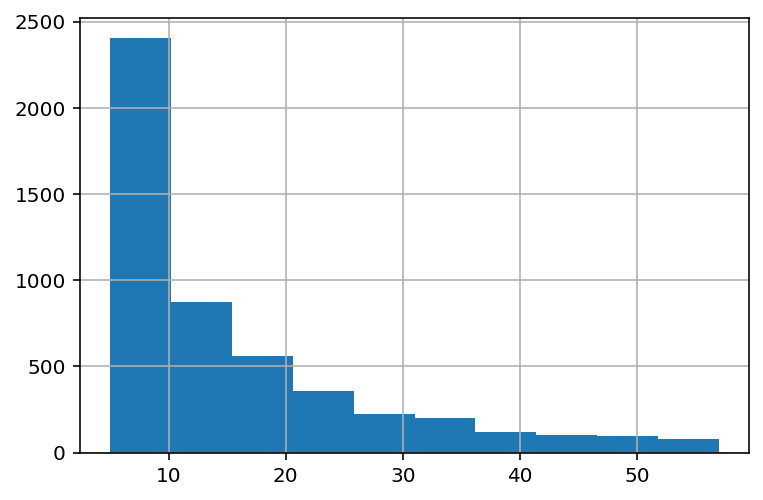

In [3]:
# 0 - 50 사이에 있는 향수의 review만 분포 살펴보기
item_df_final.sort_values(by="review")[:5000].review.hist()

- 리뷰가 10 이하인 것이 절반

### rating

<AxesSubplot:>

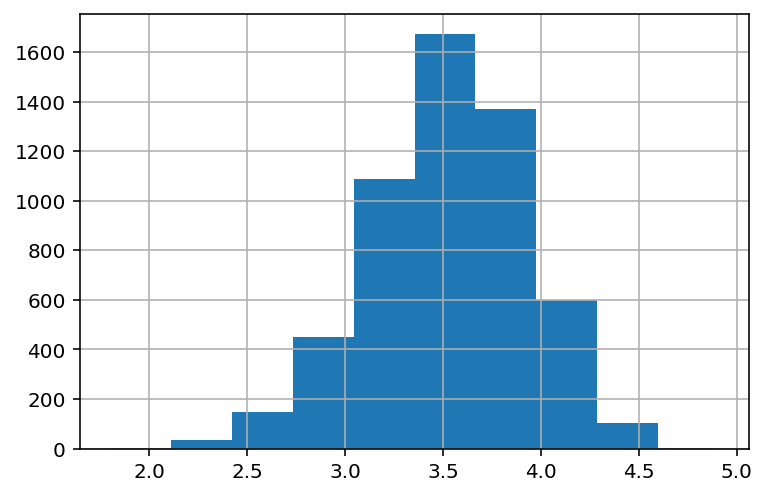

In [4]:
item_df_final.rating.hist()

- 생각보다 예쁜 분포 모양을 보여준다.
- 2.5 dlgk 4.5 이상은 거의 없음

### gender

In [5]:
import matplotlib.pyplot as plt

<AxesSubplot:>

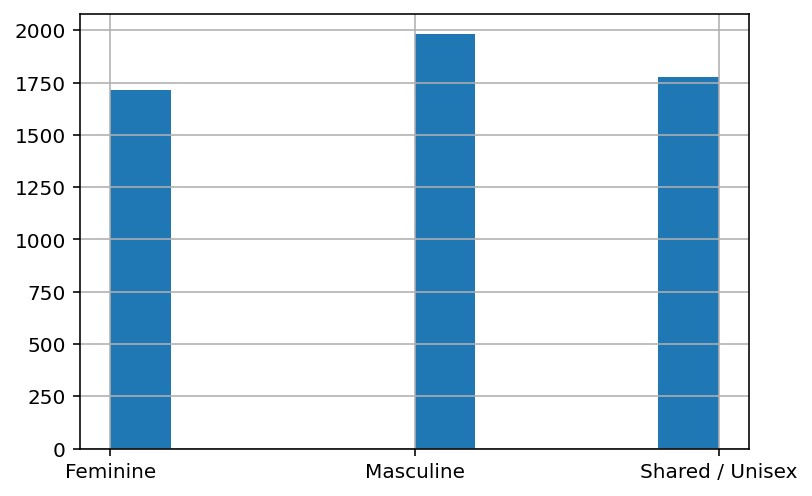

In [8]:
item_df_final.gender.hist()